# The no pass line in craps

## Winning and Losing
On the come-out roll:
- You win if the shooter rolls a 7 or 11
- You lose if the shooter rolls a 2, 3, or 12 (called "craps")
- If any other number is rolled (4, 5, 6, 8, 9, or 10), that number becomes the "point"
  
If a point is established:
- The shooter continues rolling.
- You win if the point is rolled again before a 7
- You lose if a 7 is rolled before the point (known as "sevening out")

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
win = (
      (3 / 36) * (3 / 9)     # Initial roll of 4
    + (4 / 36) * (4 / 10)    # Initial roll of 5
    + (5 / 36) * (5 / 11)    # Initial roll of 6
    + (6 / 36)               # Initial roll of 7
    + (5 / 36) * (5 / 11)    # Initial roll of 8
    + (4 / 36) * (4 / 10)    # Initial roll of 9
    + (3 / 36) * (3 / 9)     # Initial roll of 10
    + (2 / 36)               # Initial roll of 11
)
win

0.4929292929292929

In [4]:
lose = (
      (1 / 36)
    + (2 / 36)
    + (3 / 36) * (6 / 9)
    + (4 / 36) * (6 / 10)
    + (5 / 36) * (6 / 11)
    + (5 / 36) * (6 / 11)
    + (4 / 36) * (6 / 10)
    + (3 / 36) * (6 / 9)
    + (1 / 36)
)
lose

0.507070707070707

  0%|          | 0/10000 [00:00<?, ?it/s]

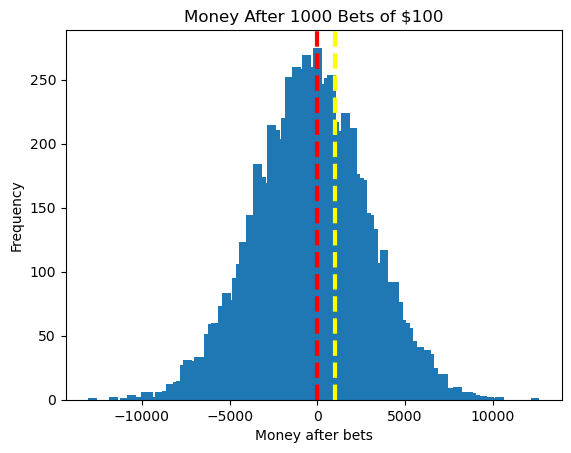

In [9]:
from tqdm.notebook import tqdm
import time

num_simulations = 10000
num_bets = 1000
starting_money = 1000
bet_size = 100
results = []


for i in tqdm(np.arange(num_simulations)):
  money = starting_money
  for j in np.arange(num_bets):
    np.random.binomial(1, win)
    if np.random.binomial(1, win):
      money += bet_size
    else:
      money -= bet_size
  results.append(money)
results = np.array(results)
np.mean(results)

import matplotlib.pyplot as plt

# Count the occurrences of each value in results
unique_values, counts = np.unique(results, return_counts=True)
min_val = np.min(results)
max_val = np.max(results)
linewidth = (max_val - min_val)/50
plt.bar(unique_values, counts, width=linewidth)
plt.axvline(x=starting_money, color='yellow', linestyle='dashed', linewidth=3)
plt.axvline(x=0, color='red', linestyle='dashed', linewidth=3)
plt.xlabel("Money after bets")
plt.ylabel("Frequency")
plt.title(f"Money After {num_bets} Bets of ${bet_size}")
plt.show()